<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>FAKE NEWS PREDICTION
</strong></h1>
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Import Necessary Libraries</strong></h1>
</div>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.metrics import roc_curve, auc

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong> Importing the Dataset</strong></h1>
</div>


In [48]:
file_path = r"F:\Experiences\02-CognoRise InfoTech-DS-Internship\Datasets\08- News.csv"
df = pd.read_csv(file_path)  

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Explore the Basics of The Dataset</strong></h1>
</div>

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [50]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


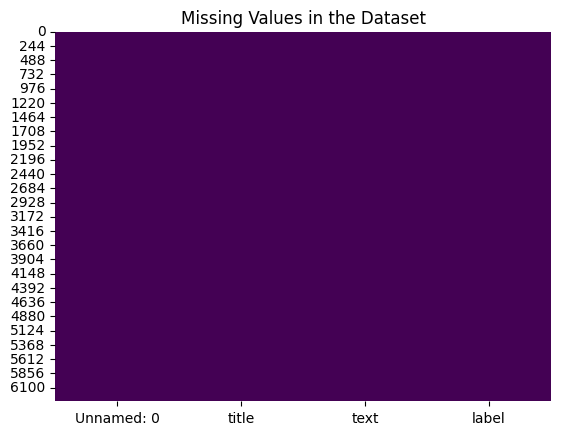

In [51]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Visualize missing values with a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in the Dataset")
plt.show()


<div style="text-align: center;"> <h1 style="font-size: 36px;"><strong>Drop unnecessary column and preprocess the text data
</strong></h1> </div>

In [52]:
df = df.drop(columns=['Unnamed: 0'])

In [53]:
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [54]:
df.sample(5)

,title,text,label
2113,Michael Klare: Whose Finger on the Nuclear But...,Here's something interesting from The Unz Revi...,FAKE
1895,ISIS claim responsibility for shooting at Texa...,The Islamic State terror group (ISIS) Tuesday ...,REAL
5487,Iowa Christians struggle to square faith with ...,"Des Moines, Iowa (CNN) As Christians, they wan...",REAL
1023,GLOBAL WARMING ALARMISTS DISAPPOINTED THAT HUR...,Home › SCIENCE & TECHNOLOGY › GLOBAL WARMING A...,FAKE
989,Texas county switches to 'emergency paper ball...,Texas county switches to 'emergency paper ball...,FAKE


In [55]:
df.columns

Index(['title', 'text', 'label'], dtype='object')

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Finding the Duplicate in The Dataset</strong></h1>
</div>

In [56]:
df[df.duplicated()]

,title,text,label
1492,"University of Missouri, please immediately fir...",To watch the video of photographer Tim Tai get...,REAL
1954,Loretta Lynch becomes first African-American w...,Washington (CNN) Loretta Lynch was sworn in as...,REAL
2336,Obamacare Enrollees Anxiously Await Supreme Co...,"“I’ve got my six-month, regular cancer checkup...",REAL
2856,Donald Trump is blatantly racist — and the med...,"Donald Trump, the actual Republican candidate ...",REAL
2952,"Black Agenda Report for Week of Oct 31, 2016","News, information and analysis from the black ...",FAKE
3081,The College Loan Bombshell Hidden in the Budget,In obscure data tables buried deep in its 2016...,REAL
3292,This astonishing chart shows how moderate Repu...,Political scientists have known for years that...,REAL
3301,OnPolitics | 's politics blog,Who has Trump appointed to his cabinet so far?...,REAL
3324,Senate GOP prepared to replace Obamacare subsi...,"Killing Obama administration rules, dismantlin...",REAL
4140,We Republicans Lost On Gay Rights. That’s A Go...,I’m not among those Republicans who have “evol...,REAL


In [57]:
# Removing duplicates from the dataset
df_cleaned = df.drop_duplicates(inplace= True)

In [58]:
df[df.duplicated()]

,title,text,label


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Exploratory Data Analysis (EDA)</strong></h1>
</div>


<div style="text-align: center;"> <h1 style="font-size: 26px;"><strong>Distribution of Fake vs Real News</strong></h1> </div>

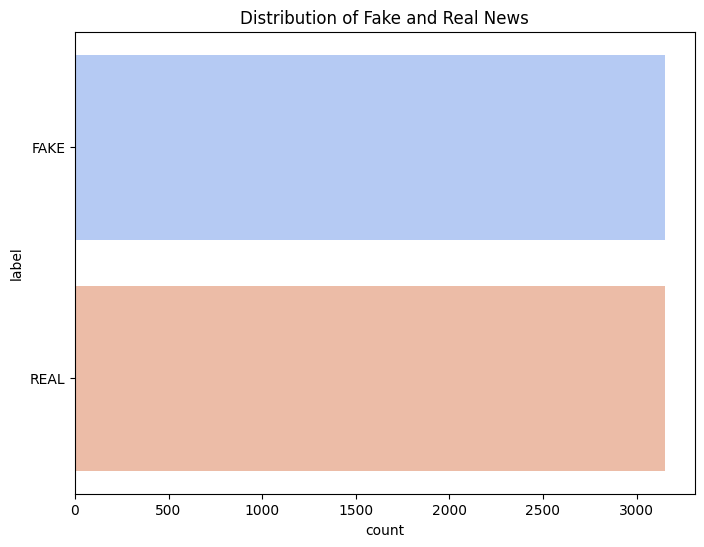

In [59]:
# Visualize the distribution of fake vs real news
plt.figure(figsize=(8, 6))
sns.countplot(df['label'], palette='coolwarm')
plt.title('Distribution of Fake and Real News')
plt.show()

<center>
      <h1 style="font-size: 36px;"><strong>Distribution of Text Length for Fake vs Real News </strong> </h1>
</center>

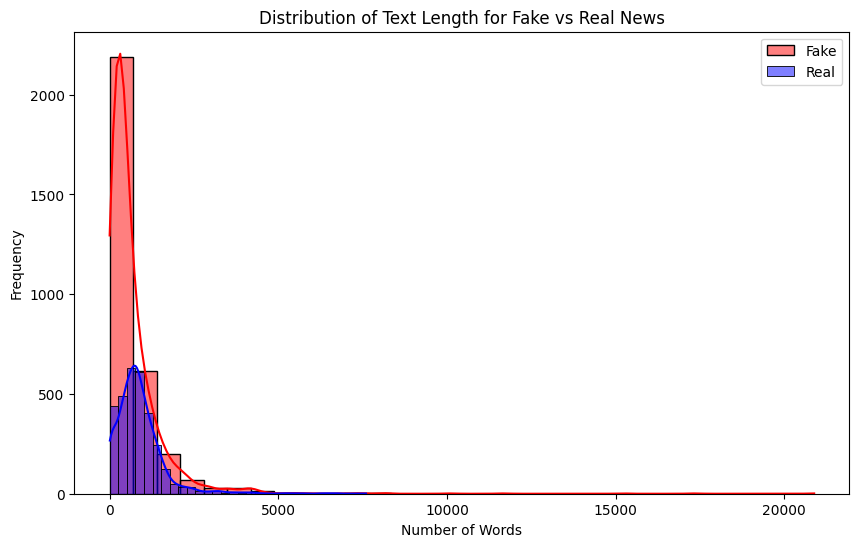

In [60]:
# Adding a column for text length
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

# Plot the distribution of text length for fake and real news
plt.figure(figsize=(10, 6))
sns.histplot(df[df['label'] == 'FAKE']['text_length'], color='red', label='Fake', kde=True, bins=30)
sns.histplot(df[df['label'] == 'REAL']['text_length'], color='blue', label='Real', kde=True, bins=30)
plt.legend()
plt.title('Distribution of Text Length for Fake vs Real News')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


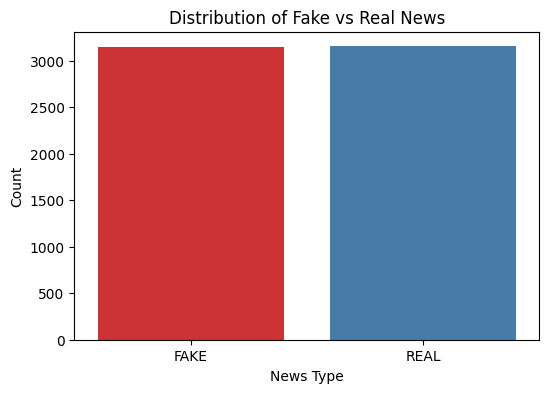

In [61]:
# Plotting the distribution of labels
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='Set1')
plt.title('Distribution of Fake vs Real News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()


<center>
      <h1 style="font-size: 36px;"><strong>Most Common Words in Real News VS Fake News</strong> </h1>
</center>

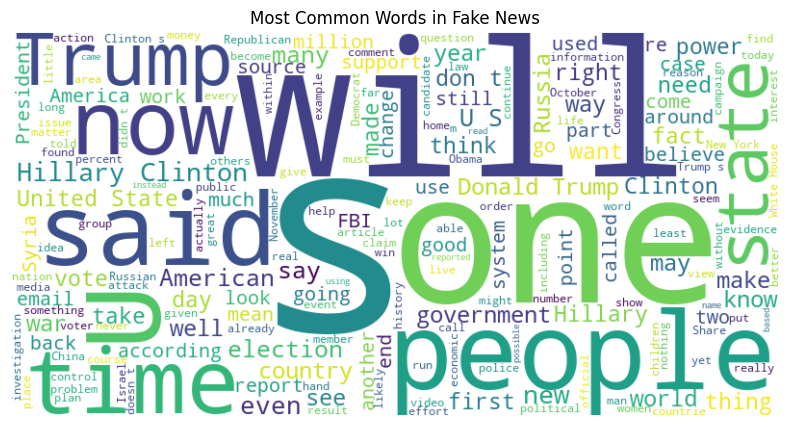

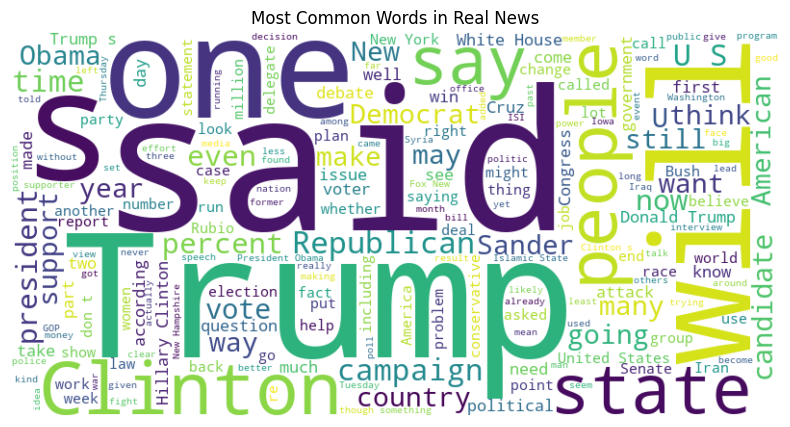

In [62]:
# Fake news word cloud
fake_text = ' '.join(df[df['label'] == 'FAKE']['text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Fake News')
plt.show()

# Real news word cloud
real_text = ' '.join(df[df['label'] == 'REAL']['text'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Real News')
plt.show()


<center>
      <h1 style="font-size: 36px;"><strong> Top Words Used in Fake and Real News </strong> </h1>
</center>

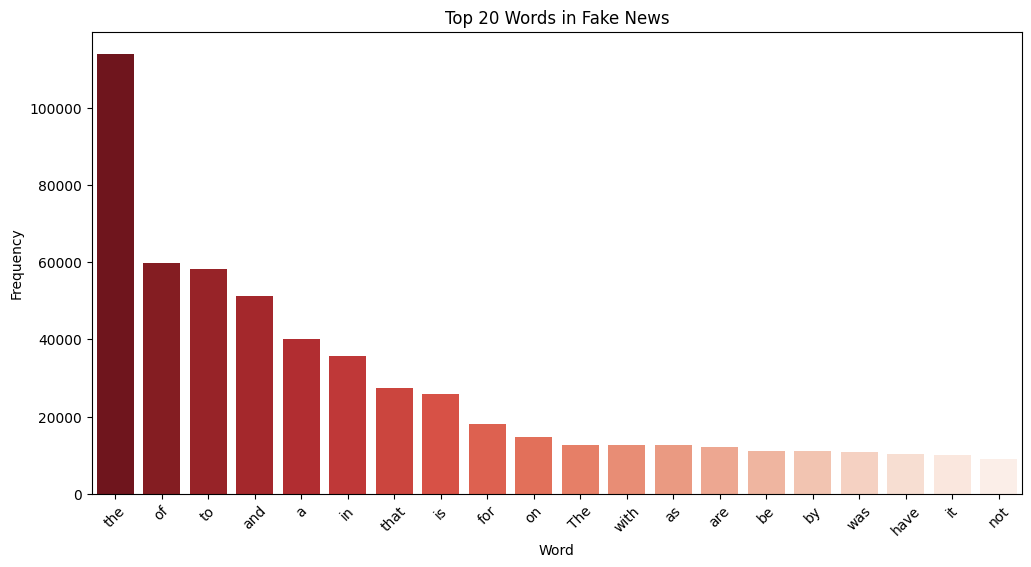

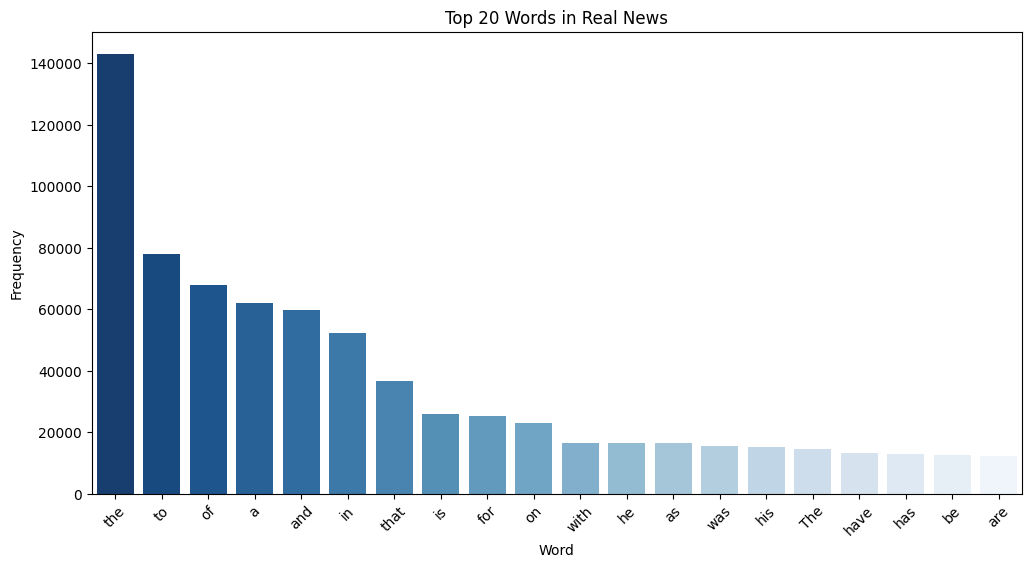

In [63]:
# Split the dataset into fake and real news
fake_news = df[df['label'] == 'FAKE']
real_news = df[df['label'] == 'REAL']

# Get the most common words in fake news
fake_words = ' '.join(fake_news['text']).split()
fake_word_freq = Counter(fake_words).most_common(20)

# Get the most common words in real news
real_words = ' '.join(real_news['text']).split()
real_word_freq = Counter(real_words).most_common(20)

# Convert to DataFrame for easier plotting
fake_df = pd.DataFrame(fake_word_freq, columns=['Word', 'Frequency'])
real_df = pd.DataFrame(real_word_freq, columns=['Word', 'Frequency'])

# Plotting the top 20 words in fake news
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=fake_df, palette='Reds_r')
plt.title('Top 20 Words in Fake News')
plt.xticks(rotation=45)
plt.show()

# Plotting the top 20 words in real news
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=real_df, palette='Blues_r')
plt.title('Top 20 Words in Real News')
plt.xticks(rotation=45)
plt.show()


<center>
      <h1 style="font-size: 36px;"><strong> Text Length vs Label</strong> </h1>
</center>

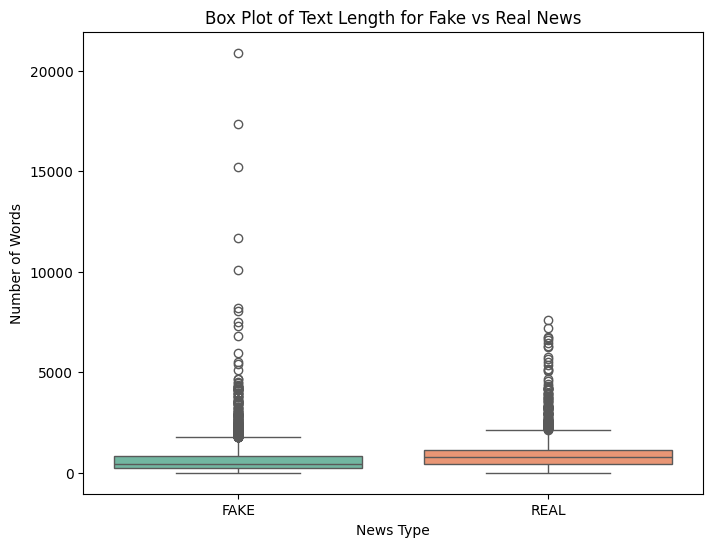

In [64]:
# Box plot of text length for fake vs real news
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='text_length', data=df, palette='Set2')
plt.title('Box Plot of Text Length for Fake vs Real News')
plt.xlabel('News Type')
plt.ylabel('Number of Words')
plt.show()


<center>
      <h1 style="font-size: 36px;"><strong> Feature Engineering</strong> </h1>
</center>

In [65]:
# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['text'])

# Define target variable
y = df['label'].map({'Fake': 0, 'Real': 1})

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<div style="text-align: center;"> <h1 style="font-size: 36px;"><strong>Build the Naive Bayes Model</strong></h1> </div>

Accuracy: 0.8922345483359746

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.91      0.86      0.88       604
        REAL       0.88      0.92      0.90       658

    accuracy                           0.89      1262
   macro avg       0.89      0.89      0.89      1262
weighted avg       0.89      0.89      0.89      1262



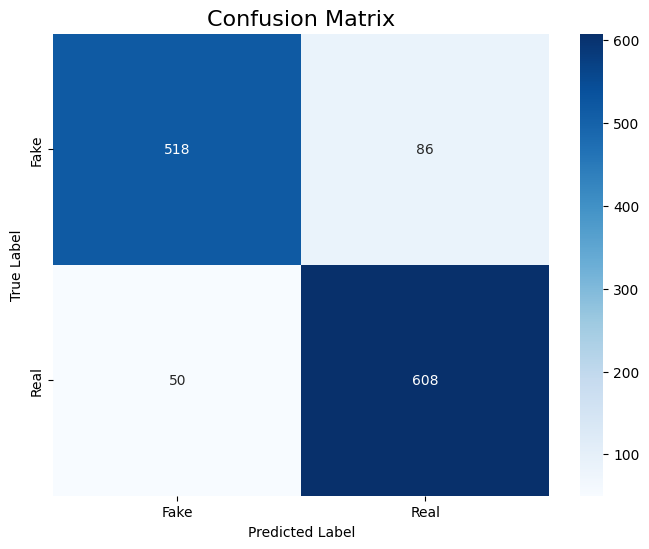

In [66]:
# Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])  # This returns a sparse matrix
y = df['label']

# Check for NaN values and remove them
df.dropna(subset=['text', 'label'], inplace=True)

# Re-vectorize after dropping NaNs to avoid errors
X = vectorizer.fit_transform(df['text'])
y = df['label'].values  # This ensures y is a 1D array

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and fit the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<center>
      <h1 style="font-size: 36px;"><strong>Feature Importance </strong> </h1>
</center>

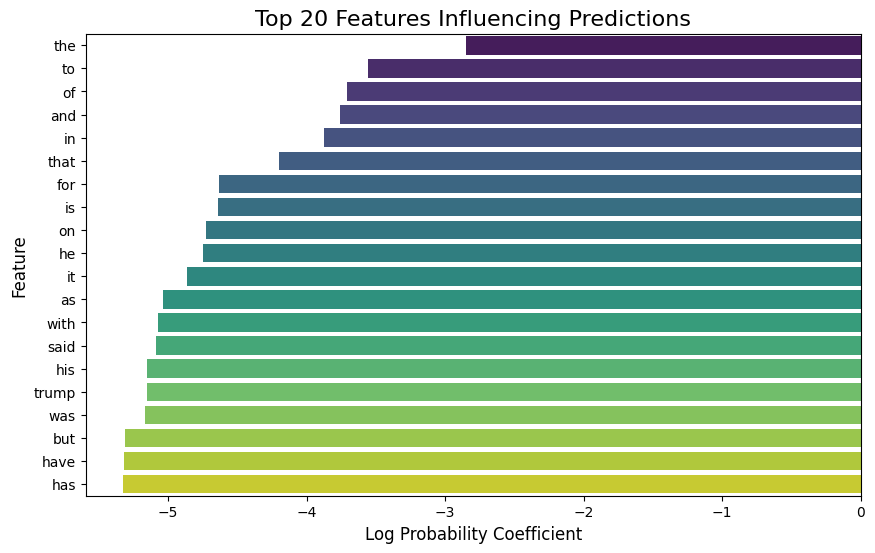

In [67]:
# Get the feature names and their corresponding coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = model.feature_log_prob_[1]  # Log probabilities for class 1 (Real)

# Create a DataFrame to hold the features and their coefficients
feature_importance = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

# Sort the DataFrame by coefficient values
feature_importance = feature_importance.sort_values(by='coefficient', ascending=False).head(20)

# Plot the top 20 features
plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y='feature', data=feature_importance, palette='viridis')
plt.title('Top 20 Features Influencing Predictions', fontsize=16)
plt.xlabel('Log Probability Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


<center>
      <h1 style="font-size: 36px;"><strong>ROC Curve </strong> </h1>
</center>

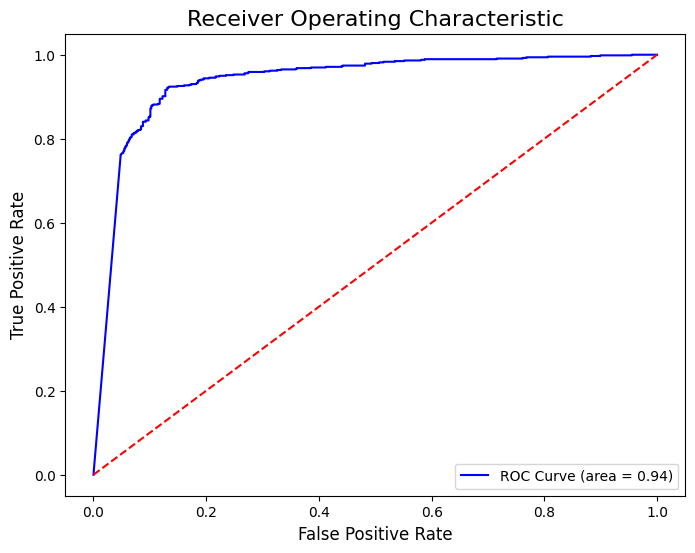

In [68]:
# Binarize the output
y_test_binary = (y_test == 'REAL').astype(int)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 'REAL'

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.show()


<center>
      <h1 style="font-size: 36px;"><strong>3D Confusion Matrix</strong> </h1>
</center>

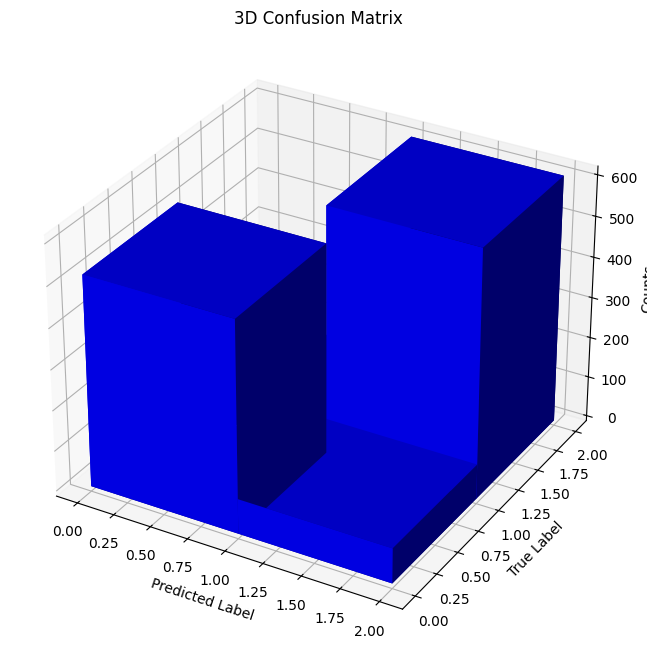

In [69]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the x, y grid
x, y = np.meshgrid(range(conf_matrix.shape[0]), range(conf_matrix.shape[1]))

# Plot 3D bars
ax.bar3d(x.flatten(), y.flatten(), np.zeros(len(x.flatten())), 1, 1, conf_matrix.flatten(), shade=True, color='blue')

# Set labels
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_zlabel('Counts')
ax.set_title('3D Confusion Matrix')

plt.show()


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong> Study Conclusion</strong></h1>
</div>


<div >
    <h1 style="font-size: 16px;"><strong>The Fake News Prediction model using Multinomial Naive Bayes achieved an accuracy of 89.2%, demonstrating strong performance in distinguishing between real and fake news. The model’s precision, recall, and f1-scores for both classes were balanced, with real news having a slightly higher recall (92%) and fake news having higher precision (91%). This suggests the model is effective at identifying fake news while maintaining a low rate of misclassifying real news. The balanced results indicate that the model generalizes well to both categories, making it a reliable tool for fake news detection. Further optimization could improve results, but current performance is promising for practical applications.
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>The End</strong></h1>
</div>

<!-- 
#MuhammadAdeel 
#DataScientist 
#DataScienceEnthusiast 
#MPhilDataScience 
#Python 
#DataAnalysis 
#MachineLearning 
#Multan 
#Pakistan 
#GitHub 
#LinkedIn
#EDA
#cirrhossis
#datacleaning
-->